In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Pull XRT (Retail ETF) data
ticker = "XRT" 
start= "2018-01-01" 
end= "2021-12-17"

retail = yf.download(ticker, start=start, end=end, progress=False)
retail = retail.asfreq(freq='D').ffill().dropna()
retail.to_csv('resources/retail.csv')
retail.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-12,92.959999,93.199997,91.040001,92.430000,92.430000,2886600.0
2021-12-13,92.209999,92.330002,88.720001,89.440002,89.440002,4774700.0
2021-12-14,88.760002,90.480003,88.349998,89.370003,89.370003,3657200.0
2021-12-15,89.209999,90.599998,87.250000,90.080002,90.080002,6397600.0
2021-12-16,90.750000,91.089996,87.139999,87.540001,87.540001,5094100.0


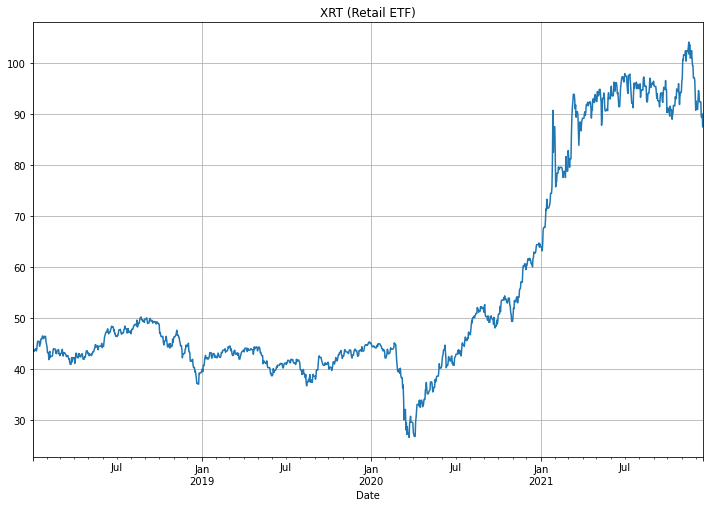

In [3]:
#Plot XRT historical prices
retail_plot = retail['Adj Close'].plot(figsize=(12,8), title='XRT (Retail ETF)', grid=True)

In [4]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2018-01-01" 

sp_history = yf.download(ticker, start=start,progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3.367250e+09
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3.538660e+09
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3.695260e+09
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3.236620e+09
2018-01-06,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3.236620e+09


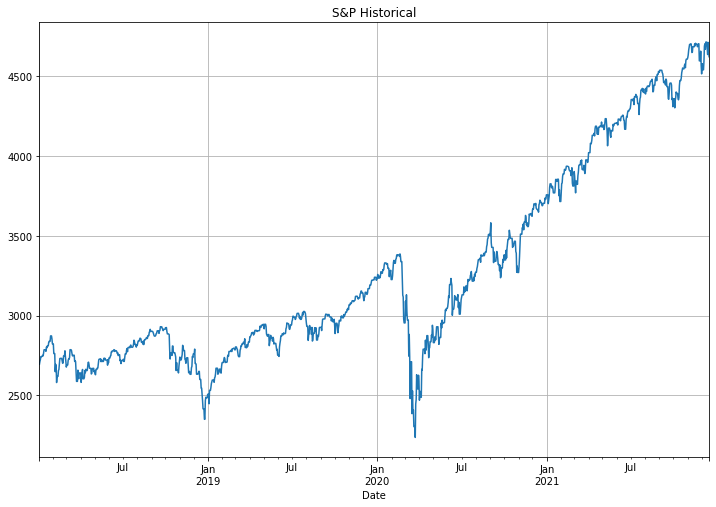

In [5]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(12,8), title='S&P Historical', grid=True)

In [6]:
#Calculate XRT percent change and 200-day rolling average
retail_percent_change = retail['Adj Close'].pct_change()
retail_percent_change_rolling = retail_percent_change.rolling(window=200).mean()

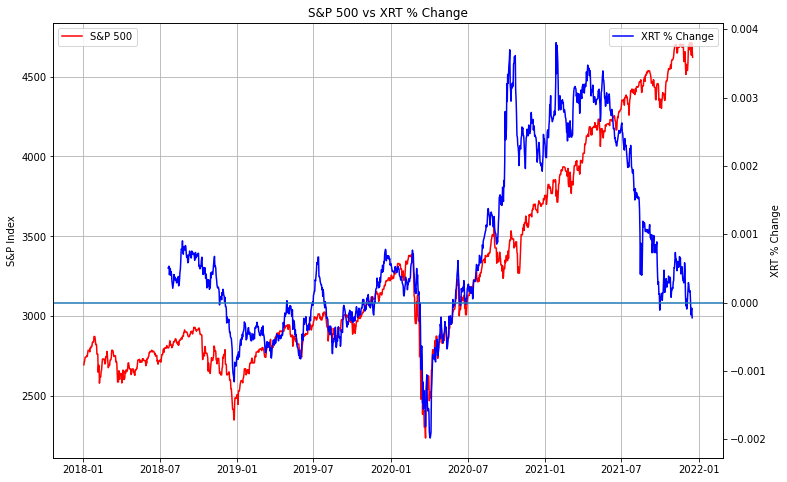

In [7]:
#Plot XRT percent change 200-day rolling average vs S&P 500 index to identify % change below and above y value of 0 
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P Index')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(retail_percent_change_rolling, label='XRT % Change', color='b')
ax.set_title('S&P 500 vs XRT % Change')
ax2.set_ylabel('XRT % Change')
ax2.axhline(y=0)
ax2.legend(loc='upper right')